#**Maestría en Inteligencia Artificial Aplicada**
##**Curso: Inteligencia Artificial y Aprendizaje Automático**
###Tecnológico de Monterrey
###Prof Luis Eduardo Falcón Morales

### **Semana 9 - Parte II/II**
####**Bayes Ingenuo (Gaussiano) : (Gaussian) Naive Bayes**

El método de Bayes Ingenuo es válido para problemas de clasificación y hace diferencia sobre si los datos de entrada son categóricos o numéricos.

Revisa la documentación correspondiente:

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.CategoricalNB.html

https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html

Puedes encontrar otras variantes sobre los tipos de entradas:

https://scikit-learn.org/stable/modules/naive_bayes.html 

El caso de métodos de Bayes para regresión genera otra cantidad de modelos que no veremos por el momento.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from collections import Counter 

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score  
from sklearn.metrics import confusion_matrix

from sklearn.naive_bayes import GaussianNB

https://www.kaggle.com/datasets/kumargh/pimaindiansdiabetescsv

In [2]:
mypath = "pima_indians_diabetes.csv"

data = pd.read_csv(mypath, sep=",", header='infer')
data.head(3)

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1


In [3]:
X = data[['Pregnancies','Glucose','BloodPressure','SkinThickness','Insulin','BMI','DiabetesPedigreeFunction','Age']]
Y = data[['Outcome']]

In [4]:
Counter(Y['Outcome'])

Counter({1: 268, 0: 500})

In [5]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, Y, train_size=0.7, random_state=7)

print(Xtrain.shape)
print(Xtest.shape)
print(ytrain.shape)
print(ytest.shape)

(537, 8)
(231, 8)
(537, 1)
(231, 1)


In [6]:
kfold = KFold(n_splits=10, random_state=7, shuffle=True)
modeloGNB = GaussianNB()
sol = cross_val_score(modeloGNB, Xtrain, np.ravel(ytrain), cv=kfold)
print(sol.mean())

0.7614954577218728


In [7]:
modeloGNB.fit(Xtrain, np.ravel(ytrain))
yhat = modeloGNB.predict(Xtest)

cm = confusion_matrix(ytest, np.ravel(yhat))    # los renglones son los reales y las columnas las predicciones.
print(cm)

[[116  31]
 [ 29  55]]


In [8]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import RocCurveDisplay 

In [9]:
modelokNN = KNeighborsClassifier().fit(Xtrain, np.ravel(ytrain))
modelokNN.score(Xtest,ytest)

0.6883116883116883

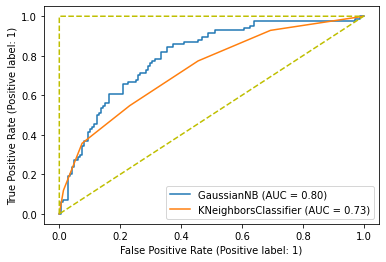

In [10]:
gnb_curve = RocCurveDisplay.from_estimator(modeloGNB, Xtest, ytest)
knn_curve = RocCurveDisplay.from_estimator(modelokNN, Xtest, ytest, ax=gnb_curve.ax_)

plt.plot([0,0,1,0],[0,1,1,0], 'y--')
plt.show() 

###**Fin del Jupyter-Notebook sobre Naive Bayes - semana 9**